['NationalNames.csv', 'NationalReadMe.pdf', 'StateNames.csv', 'StateReadMe.pdf', 'database.sqlite', 'hashes.txt']
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')
Унікальних жіночих імен: 64911
Унікальних чоловічих імен: 39199
            Name  Count
1677392    Jacob  22082
1677393    Ethan  17985
1677394  Michael  17308
1677395   Jayden  17152
1677396  William  17030
Найпопулярніше ім'я: Linda, рік: 1947, кількість: 99680
Найпопулярніше ім'я у 2008 році: Jacob, кількість: 22568
Ім'я 'Jacob' серед дівчаток було найпопулярніше у 2004, кількість: 171
Рік із найбільшою кількістю гендерно нейтральних імен: 2008, кількість імен: 2557
Year
1880     

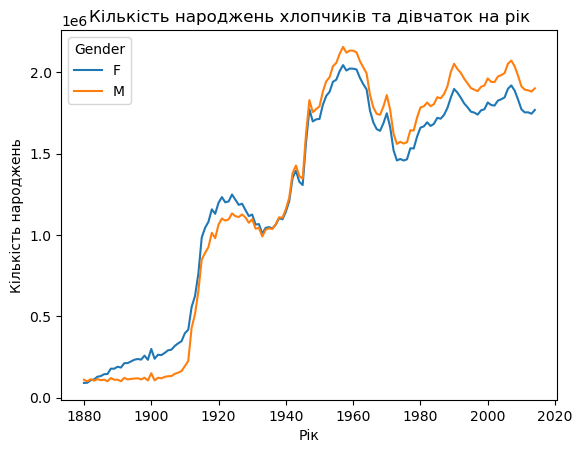

Кількість гендерно нейтральних імен: 10221
Кількість років спостереження: 135
Найпопулярніше серед непопулярних імен: Adriyana, кількість: 160


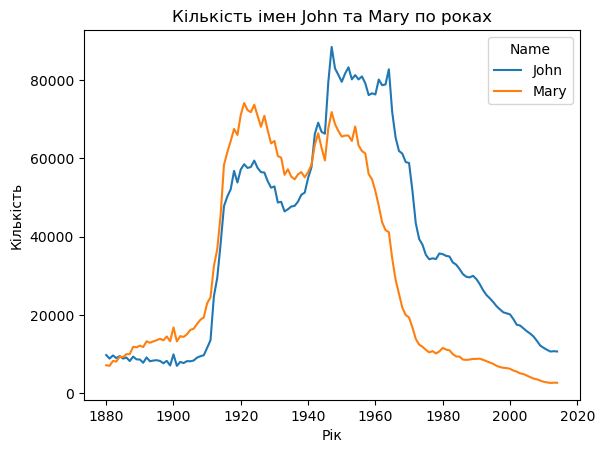

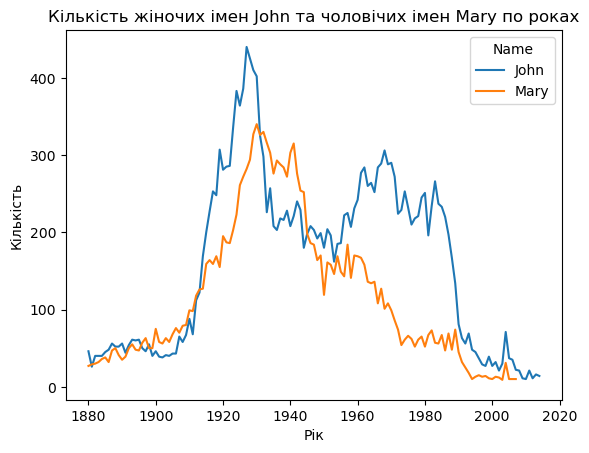

         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]


In [16]:
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt


# Шлях до архіву
archive_path = "C:/Users/yaros/Downloads/archive.zip"

with ZipFile(archive_path, 'r') as z:
    print(z.namelist())
    
    with z.open('NationalNames.csv') as f:
        df = pd.read_csv(f)

print(df.head(8))

print(df.columns)

# 6. Обчислити кількість унікальних жіночих та чоловічих імен
unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()
print(f"Унікальних жіночих імен: {unique_female_names}")
print(f"Унікальних чоловічих імен: {unique_male_names}")

# 7. Знайти 5 найпопулярніших чоловічих імен у 2010 році
popular_male_2010 = df[(df['Year'] == 2010) & (df['Gender'] == 'M')].sort_values(by='Count', ascending=False).head(5)
print(popular_male_2010[['Name', 'Count']])

# 8. Найпопулярніше ім'я за результатами одного року (ім'я з максимальним Count)
most_popular_name = df.loc[df['Count'].idxmax()]
print(f"Найпопулярніше ім'я: {most_popular_name['Name']}, рік: {most_popular_name['Year']}, кількість: {most_popular_name['Count']}")

# 12. Найпопулярніше ім'я в році з найбільшою кількістю унікальних імен
year_with_most_unique_names = df.groupby('Year')['Name'].nunique().idxmax()
most_popular_in_that_year = df[df['Year'] == year_with_most_unique_names].sort_values(by='Count', ascending=False).iloc[0]
print(f"Найпопулярніше ім'я у {year_with_most_unique_names} році: {most_popular_in_that_year['Name']}, кількість: {most_popular_in_that_year['Count']}")

# 13. Рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].sort_values(by='Count', ascending=False).iloc[0]
print(f"Ім'я 'Jacob' серед дівчаток було найпопулярніше у {jacob_female['Year']}, кількість: {jacob_female['Count']}")

# 14. Рік із найбільшою кількістю гендерно нейтральних імен
neutral_names = df.groupby(['Year', 'Name']).filter(lambda x: len(x['Gender'].unique()) > 1)
neutral_names_count_by_year = neutral_names.groupby('Year')['Name'].nunique()
year_with_most_neutral_names = neutral_names_count_by_year.idxmax()
max_neutral_names_count = neutral_names_count_by_year.max()
print(f"Рік із найбільшою кількістю гендерно нейтральних імен: {year_with_most_neutral_names}, кількість імен: {max_neutral_names_count}")

# 15. Загальна кількість народжень за рік
births_per_year = df.groupby('Year')['Count'].sum()
print(births_per_year)

# 16. Рік, коли народилося найбільше дітей
year_with_most_births = births_per_year.idxmax()
print(f"Найбільша кількість народжень була в {year_with_most_births} році, кількість: {births_per_year[year_with_most_births]}")

# 17. Кількість дівчаток та хлопчиків, які народились кожного року
gender_births_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(gender_births_per_year)

# 19. Графік загальної кількості народжень хлопчиків та дівчаток на рік
gender_births_per_year.plot(kind='line', title='Кількість народжень хлопчиків та дівчаток на рік', xlabel='Рік', ylabel='Кількість народжень')
plt.show()

# 20. Підрахунок кількості гендерно нейтральних імен (однакових для дівчат та хлопців)
neutral_names = df.groupby('Name')['Gender'].nunique() 
gender_neutral_names_count = neutral_names[neutral_names > 1].count()  
print(f"Кількість гендерно нейтральних імен: {gender_neutral_names_count}")

# 22. Підрахунок кількості років спостереження
years_observed = df['Year'].nunique()
print(f"Кількість років спостереження: {years_observed}")

# 24. Найпопулярніше серед непопулярних імен
threshold = 161
unpopular_names = df.groupby('Name')['Count'].sum().reset_index()
unpopular_names = unpopular_names[unpopular_names['Count'] < threshold]
most_popular_unpopular_name = unpopular_names.loc[unpopular_names['Count'].idxmax()]
print(f"Найпопулярніше серед непопулярних імен: {most_popular_unpopular_name['Name']}, кількість: {most_popular_unpopular_name['Count']}")

# 25. Графіки кількості імен John та Mary по роках
john_mary_counts = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
john_mary_counts.plot(kind='line', title='Кількість імен John та Mary по роках', xlabel='Рік', ylabel='Кількість')
plt.show()

# 26. Графіки кількості жіночих імен John та чоловічих імен Mary
john_female_mary_male = df[((df['Name'] == 'John') & (df['Gender'] == 'F')) | ((df['Name'] == 'Mary') & (df['Gender'] == 'M'))]
john_female_mary_male_counts = john_female_mary_male.groupby(['Year', 'Name'])['Count'].sum().unstack()
john_female_mary_male_counts.plot(kind='line', title='Кількість жіночих імен John та чоловічих імен Mary по роках', xlabel='Рік', ylabel='Кількість')
plt.show()

# 27. Найпопулярніші імена в кожному році
most_popular_each_year = df.loc[df.groupby('Year')['Count'].idxmax()]
print(most_popular_each_year[['Year', 'Name', 'Count']])